In [1]:
# load important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.cluster import KMeans

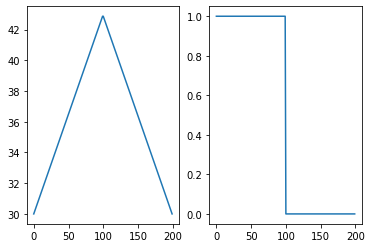

In [2]:
## Let me give you an example data made of two input values: Temperature and Volume(Turn on/Turn off)

time=list(range(0,3600))## test period
Temperature=[]
VolumneTurn=[]
for i in range(0,200):
    if i<100:
        Temperature.append(30+0.13*i)
    else:
        Temperature.append(Temperature[99]-0.13*(i-100))
for i in range(0,200):
    if i<100:
        VolumneTurn.append(1)
    else:
        VolumneTurn.append(0)  

fig = plt.figure()
t=time[0:len(Temperature)]
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(t,Temperature)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(t,VolumneTurn)

In [3]:
## The initial temperature is 30°C and it increases while the machine is working. When the machine is turned off, it starts to decrease.
## Through visualization, we can check how two datasets look like and say there are two groups based on dynamic properties: Increase and
## decrease of temperatures.

In [4]:
t_=pd.DataFrame(t,columns=['time'])
T_=pd.DataFrame(Temperature,columns=['Temperature'])
V_=pd.DataFrame(VolumneTurn,columns=['On/Off'])
data=pd.concat([T_,V_], axis=1)

In [5]:
## So, we are going to test that the datasets might be divided into two groups and the results will be compared with the above expectation.
## The number of clusters is two and the given datasets are used as features.
## Features or feature matrixes mean a collection of information on the given datasets. They can be themselves(raw input datasets) or 
## mathematical values, such as the first derivative, max-min values, and some statistical values. There are many things
## Furthermore, there is a python package: Tsfresh-package. By using this package, more than 700 features can be automatically calculated.
## Here, I want to discuss univariate and multivariate analysis. By using Tsfresh, we can calculate only univariate features.
## However, in many cases, there are several values, such as Air-Temperature, volume flow, electric power. The apperance of each value
## is totally different. So, it is hardly possible to find groups(clusters), which match all values. That is why we need benchmarking.
## Focus on temperature or Volume flow, etc.


num_clusters=2 
kmeans=KMeans(n_clusters=num_clusters,random_state=0).fit(np.array(data.values))  ## Feature
centers=kmeans.cluster_centers_
clusters_number=kmeans.labels_
clusters_number=pd.DataFrame(clusters_number,columns=['clusters_number'])
dic = {'Temperature':'°C','On/Off':' ' }
list_of_columns=['Temperature','On/Off']
colors=cm.rainbow(np.linspace(0, 1, len(data)))
for nameofcolumns in list_of_columns:
    nameofcolumns=str(nameofcolumns)
    NC=nameofcolumns
    yla=dic[nameofcolumns]
    af=plt.figure(figsize=(6,4))
    axes=af.add_axes([0.1,0.1,0.8,0.8])
    axes.scatter(t_['time'][0:len(data)],
                 data[NC][0:len(data)],s=8,c=kmeans.labels_,
                            cmap=matplotlib.colors.ListedColormap(colors))
    axes.grid(True)
    plt.xlabel("time")
    plt.ylabel(yla)
    plt.title(NC)
    plt.show()

In [6]:
## This is the result with two clusters. It is bad and doing clustering with three clusters

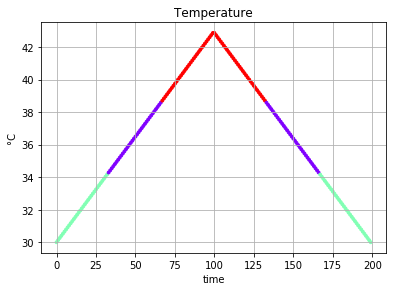

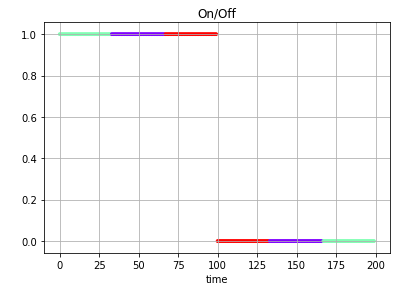

In [7]:
num_clusters=3 
kmeans=KMeans(n_clusters=num_clusters,random_state=0).fit(np.array(data.values))  ## Feature
centers=kmeans.cluster_centers_
clusters_number=kmeans.labels_
clusters_number=pd.DataFrame(clusters_number,columns=['clusters_number'])
dic = {'Temperature':'°C','On/Off':' ' }
list_of_columns=['Temperature','On/Off']
colors=cm.rainbow(np.linspace(0, 1, len(data)))
for nameofcolumns in list_of_columns:
    nameofcolumns=str(nameofcolumns)
    NC=nameofcolumns
    yla=dic[nameofcolumns]
    af=plt.figure(figsize=(6,4))
    axes=af.add_axes([0.1,0.1,0.8,0.8])
    axes.scatter(t_['time'][0:len(data)],
                 data[NC][0:len(data)],s=8,c=kmeans.labels_,
                            cmap=matplotlib.colors.ListedColormap(colors))
    axes.grid(True)
    plt.xlabel("time")
    plt.ylabel(yla)
    plt.title(NC)
    plt.show()

In [8]:
#\ At this moment, I am wondering what happends if only one dataset(Volume: Turn on/off) could be used to find clusters based on dynamic properties.
## As mentioned, collected datasets can be as input-datasets(features) and the dataset(Volume: Turn on/off) has exactly the same information
## on dynamic states(Increase and decrease of temperature). So, lets's use it as a feature

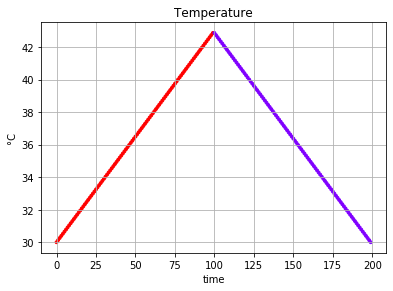

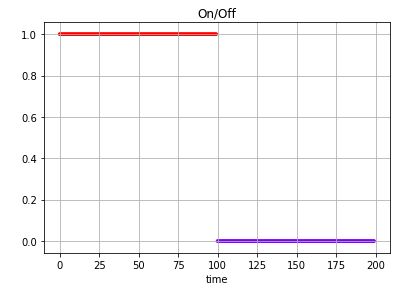

In [9]:
num_clusters=2 
kmeans=KMeans(n_clusters=num_clusters,random_state=0).fit(np.array(V_.values))  ## Feature
centers=kmeans.cluster_centers_
clusters_number=kmeans.labels_
clusters_number=pd.DataFrame(clusters_number,columns=['clusters_number'])
dic = {'Temperature':'°C','On/Off':' ' }
list_of_columns=['Temperature','On/Off']
colors=cm.rainbow(np.linspace(0, 1, len(data)))
for nameofcolumns in list_of_columns:
    nameofcolumns=str(nameofcolumns)
    NC=nameofcolumns
    yla=dic[nameofcolumns]
    af=plt.figure(figsize=(6,4))
    axes=af.add_axes([0.1,0.1,0.8,0.8])
    axes.scatter(t_['time'][0:len(data)],
                 data[NC][0:len(data)],s=8,c=kmeans.labels_,
                            cmap=matplotlib.colors.ListedColormap(colors))
    axes.grid(True)
    plt.xlabel("time")
    plt.ylabel(yla)
    plt.title(NC)
    plt.show()

In [10]:
## This is exactly what I want to have and it can be analyzed that the input dataset(Volume: Turn on/off) consists of two ares(1: Turn on/ 0: Turn off)
## So, samples of the dataset are seperately scattered in one dimension and this seperation makes the samples divide into two clusters.
## It means that If we find methods which make samples groups according to our needs, we can do clustering easily.
## To find clusters based on dynamic properties, we can use first derivative, but still the result of the first derivative is numerical values.
## To make sure, we can make those values divide into groups using their signs(+ or -). Through this method, the samples can be divided into clusters
## Or Turn on/off might be expressed 1 or 0 value(connect and disconnect). So this dataset can be used directly without any data preprocessing.
## It might be possible to ask how many features(inputdata for clustering process) should be used and it is too difficult to answer just
## one word, because we are talking about data-mining(data analysis) and all processes depeond on datasets and there is no unique answer,
## just we can say something based on our experience.

In [11]:
# Now I want to check if the first derivative of temperatures is worth for our goal.
diff_T=np.gradient(Temperature)
diff_T_=pd.DataFrame(diff_T,columns=['The first derivative of temperature'])

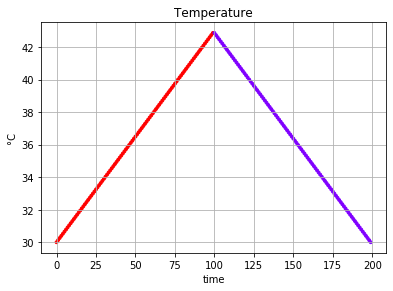

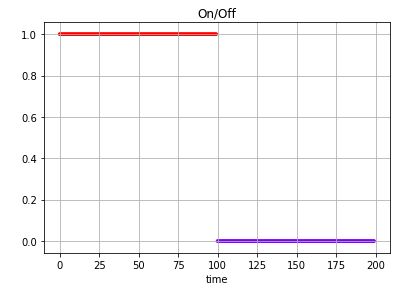

In [12]:
num_clusters=2 
kmeans=KMeans(n_clusters=num_clusters,random_state=0).fit(np.array(diff_T_.values))  ## Feature
centers=kmeans.cluster_centers_
clusters_number=kmeans.labels_
clusters_number=pd.DataFrame(clusters_number,columns=['clusters_number'])
dic = {'Temperature':'°C','On/Off':' ' }
list_of_columns=['Temperature','On/Off']
colors=cm.rainbow(np.linspace(0, 1, len(data)))
for nameofcolumns in list_of_columns:
    nameofcolumns=str(nameofcolumns)
    NC=nameofcolumns
    yla=dic[nameofcolumns]
    af=plt.figure(figsize=(6,4))
    axes=af.add_axes([0.1,0.1,0.8,0.8])
    axes.scatter(t_['time'][0:len(data)],
                 data[NC][0:len(data)],s=8,c=kmeans.labels_,
                            cmap=matplotlib.colors.ListedColormap(colors))
    axes.grid(True)
    plt.xlabel("time")
    plt.ylabel(yla)
    plt.title(NC)
    plt.show()

In [14]:
## It appears that the first derivate is one of useful features to find clusters based on dynamic properties. This is because 
## temperature-function is a linear equation. So, the values of the first derivative are only positive and negative values(clearly seperated)
## if it is a quadratic or cubic equation, it might be not best answer, but still
## There is no doubt that it is still useful.

In [15]:
## Now I want to talk about the number of clusters. There are several differences between classification and clustering such as
## we have no labels, which means no idea how many groups(clusters) and how samples should be divided into groups.
## Even after clustering, we have no reference which can be compared with the result of clustering. So, we need to make our guildlines
## to evaluate the result of clustering ourselves and this is too difficult, because if we have the same datasets, but we might have different 
## clusters. It is subjective. So, we have to do clustering and to make others understand why MY CLUSTERS are better than OTHERS.
## At first, let's talk about the number of clusters.
## It is ironic that we have no idea about the number of clusters, but should define the number of clusters to do clustering.
## So, I did calculate several numbers of clusters and compared the result of clustering based on a validation measure: S-dbw index

In [16]:
from s_dbw import S_Dbw

S_Dbw    19
dtype: int64

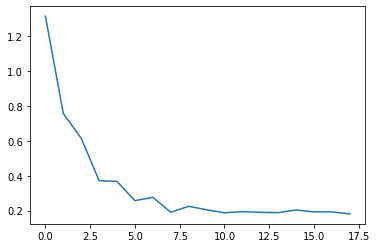

In [18]:
list_value=[]
new_form=[]
new_form_data=[]
new_form_data=pd.DataFrame(new_form_data)
for k in range(2,20):
    num_clusters=k 
    kmeans=KMeans(n_clusters=num_clusters,random_state=0).fit(np.array(data.values))  ## Feature
    centers=kmeans.cluster_centers_
    clusters_number=kmeans.labels_
    clusters_number=pd.DataFrame(clusters_number,columns=['clusters_number'])
    data_cleaned_cl=pd.concat([data,clusters_number], axis=1)
    from s_dbw import S_Dbw
    s_dbw_index= S_Dbw(data.values, kmeans.labels_, centers_id=None, method='Tong', alg_noise='bind',centr='mean', nearest_centr=True, metric='euclidean')
    list_value.append(s_dbw_index)

list_value_beta=pd.DataFrame(list_value)
for i in range(2,20):
    for j in range(1):
        new_form.append(list_value_beta.values[1*(i-2)+j])
    new_form=pd.DataFrame(new_form)
    new_form_data=pd.concat([new_form_data,new_form], axis=1)
    new_form=[]    


new_form_data=new_form_data.transpose()
new_form_data.columns=['S_Dbw']
new_form_data.index=range(2,20)
new_form_data=pd.concat([new_form_data], axis=1)
x=range(len(new_form_data))
plt.plot(x,new_form_data['S_Dbw'])
new_form_data.idxmin()

In [19]:
## The minimal value of S-dbw indicates what the optimal number of clusters is. There are several internal validation indices, but
## I used S-dbw index, because it does not depend on the type of datasets(shapes, distribution)